In [0]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Test Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

<h2>MODEL1 : Three Convolutional Network with Adadelta as optimizer</h2>

<h3>1.1 with kernal_size = (3,3), Dropout = 0.5 and MaxPooling(pool_size =(2,2))

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(75, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 186s 3ms/step - loss: 0.2920 - acc: 0.9100 - val_loss: 0.0505 - val_acc: 0.9849
Epoch 2/12
60000/60000 [==============================] - 180s 3ms/step - loss: 0.0919 - acc: 0.9726 - val_loss: 0.0427 - val_acc: 0.9868
Epoch 3/12
60000/60000 [==============================] - 180s 3ms/step - loss: 0.0659 - acc: 0.9804 - val_loss: 0.0275 - val_acc: 0.9907
Epoch 4/12
60000/60000 [==============================] - 180s 3ms/step - loss: 0.0556 - acc: 0.9842 - val_loss: 0.0280 - val_acc: 0.9901
Epoch 5/12
60000/60000 [==============================] - 180s 3ms/step - loss: 0.0448 - acc: 0.9873 - val_loss: 0.0250 - val_acc: 0.9922
Epoch 6/12
60000/60000 [==============================] - 180s 3ms/step - loss: 0.0395 - acc: 0.9890 - val_loss: 0.0267 - val_acc: 0.9923
Epoch 7/12
60000/60000 [==============================] - 180s 3ms/step - loss: 0.0354 - acc: 0.9898 - val_loss: 0.0267 - 

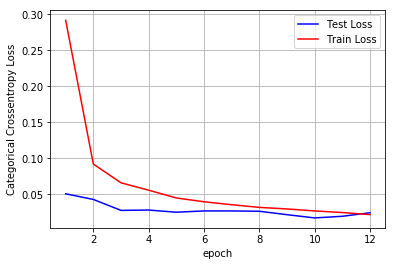

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h3>1.2 with kernal_size = (2,2), BN and MaxPooling</h3>

In [0]:
model = Sequential()
model.add(Conv2D(22, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(44, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(66, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 35s 578us/step - loss: 0.1689 - acc: 0.9509 - val_loss: 0.1136 - val_acc: 0.9641
Epoch 2/12
60000/60000 [==============================] - 34s 563us/step - loss: 0.0549 - acc: 0.9830 - val_loss: 0.0489 - val_acc: 0.9847
Epoch 3/12
60000/60000 [==============================] - 34s 563us/step - loss: 0.0372 - acc: 0.9887 - val_loss: 0.0573 - val_acc: 0.9833
Epoch 4/12
60000/60000 [==============================] - 34s 564us/step - loss: 0.0285 - acc: 0.9911 - val_loss: 0.0525 - val_acc: 0.9846
Epoch 5/12
60000/60000 [==============================] - 34s 564us/step - loss: 0.0219 - acc: 0.9932 - val_loss: 0.0971 - val_acc: 0.9716
Epoch 6/12
60000/60000 [==============================] - 34s 564us/step - loss: 0.0180 - acc: 0.9948 - val_loss: 0.0396 - val_acc: 0.9883
Epoch 7/12
60000/60000 [==============================] - 34s 564us/step - loss: 0.0135 - acc: 0.9962 - val_loss: 0.

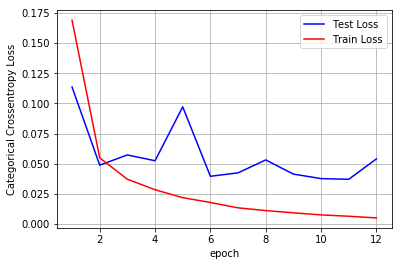

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h3>1.3 with kernal_size = (5,5), Dropout = 0.3, BN and MaxPooling</h3>

In [0]:
model = Sequential()
model.add(Conv2D(44, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(89, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(165, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(97, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 188s 3ms/step - loss: 0.7024 - acc: 0.7695 - val_loss: 4.6582 - val_acc: 0.3859
Epoch 2/12
60000/60000 [==============================] - 188s 3ms/step - loss: 0.3975 - acc: 0.8714 - val_loss: 4.8570 - val_acc: 0.3057
Epoch 3/12
60000/60000 [==============================] - 189s 3ms/step - loss: 0.2876 - acc: 0.9090 - val_loss: 0.3090 - val_acc: 0.9044
Epoch 4/12
60000/60000 [==============================] - 188s 3ms/step - loss: 0.2319 - acc: 0.9283 - val_loss: 1.1523 - val_acc: 0.7380
Epoch 5/12
60000/60000 [==============================] - 187s 3ms/step - loss: 0.2063 - acc: 0.9359 - val_loss: 0.9241 - val_acc: 0.7260
Epoch 6/12
60000/60000 [====================

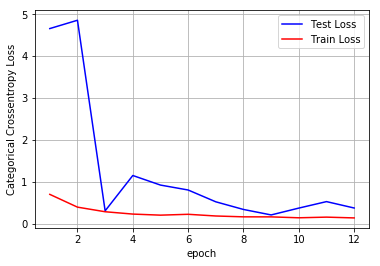

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2>MODEL2 : Five Convolutional Network with Adadelta as optimizer</h2>

<h3>2.1 with kernal_size = (3,3), Dropout = 0.25 and MaxPooling(pool_size =(3,3))

In [0]:
model = Sequential()
model.add(Conv2D(25, kernel_size=(3, 3), activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(55, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(78, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(108, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 50s 833us/step - loss: 12.4907 - acc: 0.1164 - val_loss: 14.5482 - val_acc: 0.0974
Epoch 2/12
60000/60000 [==============================] - 49s 816us/step - loss: 14.5415 - acc: 0.0977 - val_loss: 14.5482 - val_acc: 0.0974
Epoch 3/12
60000/60000 [==============================] - 49s 814us/step - loss: 14.5400 - acc: 0.0978 - val_loss: 14.5482 - val_acc: 0.0974
Epoch 4/12
60000/60000 [==============================] - 49s 820us/step - loss: 14.5445 - acc: 0.0975 - val_loss: 14.5482 - val_acc: 0.0974
Epoch 5/12
60000/60000 [==============================] - 49s 817us/step - loss: 14.5453 - acc: 0.0976 - val_loss: 14.5482 - val_acc: 0.0974
Epoch 6/12
60000/60000 [==============================] - 49s 818us/step - loss: 14.5436 - acc: 0.0977 - val_loss: 14.5482 - val_acc: 0.0974
Epoch 7/12
60000/60000 [==============================] - 49s 817us/step - loss: 14.5463 - acc: 0.0975 -

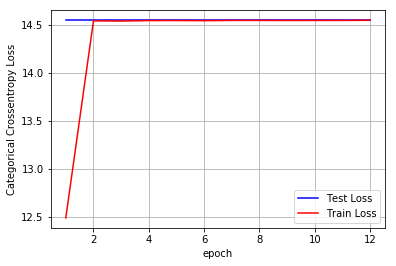

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h3>2.2 with kernal_size = (2,2), BN and MaxPooling</h3>

In [0]:
model = Sequential()
model.add(Conv2D(29, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(38, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(49, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(65, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(85, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(133, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(95, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(76, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 47s 782us/step - loss: 0.1992 - acc: 0.9398 - val_loss: 0.3477 - val_acc: 0.8866
Epoch 2/12
60000/60000 [==============================] - 45s 751us/step - loss: 0.0638 - acc: 0.9800 - val_loss: 1.9318 - val_acc: 0.5085
Epoch 3/12
60000/60000 [==============================] - 46s 759us/step - loss: 0.0454 - acc: 0.9859 - val_loss: 0.2556 - val_acc: 0.9166
Epoch 4/12
60000/60000 [==============================] - 46s 759us/step - loss: 0.0361 - acc: 0.9890 - val_loss: 0.1088 - val_acc: 0.9672
Epoch 5/12
60000/60000 [==============================] - 45s 755us/step - loss: 0.0286 - acc: 0.9910 - val_loss: 0.3016 - val_acc: 0.9196
Epoch 6/12
60000/60000 [==============================] - 45s 754us/step - loss: 0.0236 - acc: 0.9924 - val_loss: 0.0625 - val_acc: 0.9812
Epoch 7/12
60000/60000 [==============================] - 45s 754us/step - loss: 0.0226 - acc: 0.9926 - val_loss: 0.

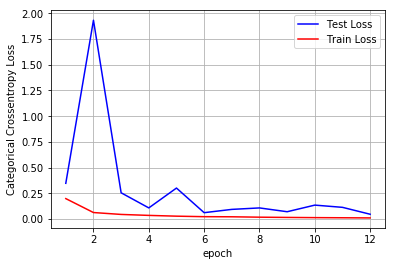

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h3>2.3 with kernal_size = (5,5), Dropout = 0.3, BN and MaxPooling</h3>

In [0]:
model = Sequential()
model.add(Conv2D(22, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(43, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(78, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(93, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(117, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(86, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(65, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(45, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 178s 3ms/step - loss: 14.0103 - acc: 0.1022 - val_loss: 14.5353 - val_acc: 0.0982
Epoch 2/12
60000/60000 [==============================] - 177s 3ms/step - loss: 14.5056 - acc: 0.1000 - val_loss: 14.5353 - val_acc: 0.0982
Epoch 3/12
60000/60000 [==============================] - 177s 3ms/step - loss: 14.4976 - acc: 0.1005 - val_loss: 14.5353 - val_acc: 0.0982
Epoch 4/12
60000/60000 [==============================] - 177s 3ms/step - loss: 14.5168 - acc: 0.0993 - val_loss: 14.5353 - val_acc: 0.0982
Epoch 5/12
60000/60000 [==============================] - 176s 3ms/step - loss: 14.5251 - acc: 0.0988 - val_loss: 14.5353 - val_acc: 0.0982
Epoch 6/12
60000/60000 [==============================] - 176s 3ms/step - loss: 14.5358 - acc: 0.0982 - val_loss: 14.5353 - val_acc: 0.0982
Epoch 7/12
60000/60000 [==============================] - 177s 3ms/step - loss: 14.5408 - acc: 0.0979 - val_lo

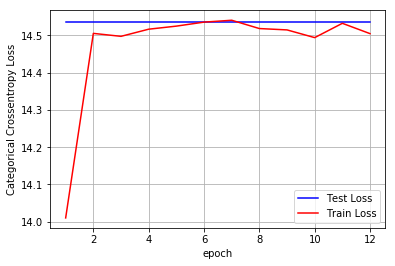

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2>MODEL3 : Seven Convolutional Network with Adadelta as optimizer</h2>

<h3>3.1 with kernal_size = (3,3), Dropout = 0.25 and MaxPooling(pool_size =(3,3))

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(45, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(60, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), padding='same'))

model.add(Conv2D(78, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), padding='same'))

model.add(Conv2D(95, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), padding='same'))

model.add(Conv2D(112, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), padding='same'))

model.add(Conv2D(145, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 53s 882us/step - loss: 2.3015 - acc: 0.1119 - val_loss: 2.3008 - val_acc: 0.1135
Epoch 2/12
60000/60000 [==============================] - 51s 851us/step - loss: 2.2902 - acc: 0.1231 - val_loss: 2.3012 - val_acc: 0.1135
Epoch 3/12
60000/60000 [==============================] - 51s 848us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 4/12
60000/60000 [==============================] - 51s 847us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 5/12
60000/60000 [==============================] - 51s 847us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 6/12
60000/60000 [==============================] - 51s 850us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 7/12
60000/60000 [==============================] - 51s 846us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.

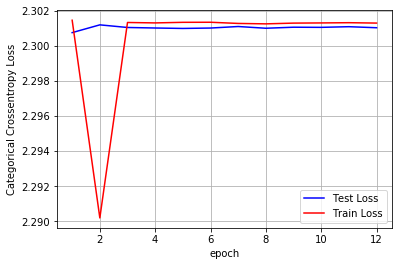

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h3>3.2 with kernal_size = (2,2), BN and MaxPooling</h3>

In [0]:
model = Sequential()
model.add(Conv2D(22, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(45, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(65, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(97, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(114, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(126, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(143, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(97, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(65, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 47s 777us/step - loss: 0.1836 - acc: 0.9442 - val_loss: 9.1206 - val_acc: 0.2095
Epoch 2/12
60000/60000 [==============================] - 45s 743us/step - loss: 0.0667 - acc: 0.9796 - val_loss: 2.3494 - val_acc: 0.5170
Epoch 3/12
60000/60000 [==============================] - 45s 746us/step - loss: 0.0519 - acc: 0.9842 - val_loss: 8.5230 - val_acc: 0.3702
Epoch 4/12
60000/60000 [==============================] - 45s 758us/step - loss: 0.0492 - acc: 0.9849 - val_loss: 6.4195 - val_acc: 0.3570
Epoch 5/12
60000/60000 [==============================] - 45s 757us/step - loss: 0.0375 - acc: 0.9884 - val_loss: 12.8700 - val_acc: 0.1010
Epoch 6/12
60000/60000 [==============================] - 45s 757us/step - loss: 0.0318 - acc: 0.9898 - val_loss: 2.4923 - val_acc: 0.4857
Epoch 7/12
60000/60000 [==============================] - 46s 759us/step - loss: 0.0285 - acc: 0.9911 - val_loss: 4

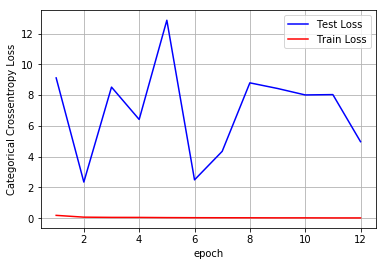

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h3>3.3 with kernal_size = (5,5), Dropout = 0.3, BN and MaxPooling</h3>

In [0]:
model = Sequential()
model.add(Conv2D(12, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(43, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(60, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(85, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(112, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(143, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(157, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(98, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(56, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 214s 4ms/step - loss: 2.2220 - acc: 0.2064 - val_loss: 6.6590 - val_acc: 0.1135
Epoch 2/12
60000/60000 [==============================] - 212s 4ms/step - loss: 1.3812 - acc: 0.4362 - val_loss: 1.4635 - val_acc: 0.3390
Epoch 3/12
60000/60000 [==============================] - 211s 4ms/step - loss: 1.1214 - acc: 0.5511 - val_loss: 10.6865 - val_acc: 0.1010
Epoch 4/12
60000/60000 [==============================] - 211s 4ms/step - loss: 1.1125 - acc: 0.5517 - val_loss: 0.8543 - val_acc: 0.7123
Epoch 5/12
60000/60000 [==============================] - 211s 4ms/step - loss: 1.2372 - acc: 0.5118 - val_loss: 5.7753 - val_acc: 0.1164
Epoch 6/12
60000/60000 [==============================] - 212s 4ms/step - loss: 1.1486 - acc: 0.5430 - val_loss: 3.4401 - val_acc: 0.1302
Epoch 7/12
60000/60000 [==============================] - 212s 4ms/step - loss: 1.0421 - acc: 0.5859 - val_loss: 2.2447 -

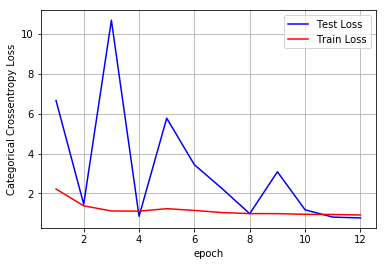

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [3]:
#Activation function is relu in each layers
#Adadelta optimizers is used in each case
#MaxPooling is used in each case of cnn_layers of pool_size=(2, 2)

from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["No. of CNN_Layers","kernal_size","Batch Normalisations","Dropout","No. of hidden layers", "Test loss", "Test Accuracy"]

x.add_row([3, (3,3), "No", 0.5, 1, 0.024, 0.99])
x.add_row([3, (2,2), "Yes", "No dropout", 1, 0.054, 0.98])
x.add_row([3, (5,5), "Yes", 0.3, 2, 0.376, 0.87])
x.add_row([5, (3,3), "No", 0.25, 1, 14.548, 0.09])
x.add_row([5, (2,2), "Yes", "No droput", 3, 0.047, 0.98])
x.add_row([5, (5,5), "Yes", 0.3, 3, 14.53, 0.09])
x.add_row([7, (3,3), "No", 0.25, 1, 2.30, 0.11])
x.add_row([7, (2,2), "Yes", "No dropout", 2, 4.974, 0.50])
x.add_row([7, (5,5), "Yes", 0.3, 2, 0.773, 0.74])
print(x)

+-------------------+-------------+----------------------+------------+----------------------+-----------+---------------+
| No. of CNN_Layers | kernal_size | Batch Normalisations |  Dropout   | No. of hidden layers | Test loss | Test Accuracy |
+-------------------+-------------+----------------------+------------+----------------------+-----------+---------------+
|         3         |    (3, 3)   |          No          |    0.5     |          1           |   0.024   |      0.99     |
|         3         |    (2, 2)   |         Yes          | No dropout |          1           |   0.054   |      0.98     |
|         3         |    (5, 5)   |         Yes          |    0.3     |          2           |   0.376   |      0.87     |
|         5         |    (3, 3)   |          No          |    0.25    |          1           |   14.548  |      0.09     |
|         5         |    (2, 2)   |         Yes          | No droput  |          3           |   0.047   |      0.98     |
|         5     

<h2> step by step procedure for above experiment</h2>

1.Three different architecture of convolution layer has been implemented.There are three , five and seven convolution layers with "**Adadelta optimizers**" in each case

2.**First architecture i.e. three convolution layer** has been further experimented in three more categories.

3.In each categories, with different kernal size, dropout and maxpooling experiment has been performed

4.For the first categories kernal size is (3,3), dropout=0.5 and maxpoolsize=(3,3).

5.For the second categories kernal size is(2,2), same maxpooling as above with bathnormalisation and with no dropout experiment has been performed.

6.For the third categories kernal size is(5,5), same maxpooling with bathnormalisation and dropout= 0.3 experiment has been performed.

7.for each categories test score and test accuracy has been evaluated with different parameter.


8.**Second architecture (i.e. five convolution layer)** has been further experimented in three more categories in the same way as first architecture.

9.In each categories, with different kernal size, dropout and maxpooling experiment has been performed

10.For the first categories kernal size is (3,3), dropout=0.25 and maxpoolsize=(3,3).

11.For the second categories kernal size is(2,2), same maxpooling as above with bathnormalisation and with no dropout experiment has been performed.

12.For the third categories kernal size is(5,5), same maxpooling with bathnormalisation and dropout= 0.3 experiment has been performed.

13.for each categories test score and test accuracy has been evaluated with different parameter.


14.**Third architecture (i.e. Seven convolution layer)** has been further experimented in three more categories in the same way as first and second architecture.

15.In each categories, with different kernal size, dropout and maxpooling experiment has been performed

16.For the first categories kernal size is (3,3), dropout=0.25 and maxpoolsize=(3,3).

17.For the second categories kernal size is(2,2), same maxpooling as above with bathnormalisation and with no dropout experiment has been performed.

18.For the third categories kernal size is(5,5), same maxpooling with bathnormalisation and dropout= 0.3 experiment has been performed.

19.for each categories test score and test accuracy has been evaluated with different parameter.

20.see the **preetytable** to observe the different result in different case 

<h2>MODEL1 : Three Convolutional Network with Adam as optimizer</h2>

<h3>1.1 with kernal_size = (3,3), Dropout = 0.5 and MaxPooling(pool_size =(2,2))

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(75, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 179s 3ms/step - loss: 0.3042 - acc: 0.9072 - val_loss: 0.0479 - val_acc: 0.9850
Epoch 2/12
60000/60000 [==============================] - 178s 3ms/step - loss: 0.0999 - acc: 0.9708 - val_loss: 0.0312 - val_acc: 0.9885
Epoch 3/12
60000/60000 [==============================] - 178s 3ms/step - loss: 0.0728 - acc: 0.9787 - val_loss: 0.0310 - val_acc: 0.9893
Epoch 4/12
60000/60000 [==============================] - 178s 3ms/step - loss: 0.0574 - acc: 0.9839 - val_loss: 0.0229 - val_acc: 0.9916
Epoch 5/12
60000/60000 [==============================] - 177s 3ms/step - loss: 0.0463 - acc: 0.9864 - val_loss: 0.0223 - val_acc: 0.9924
Epoch 6/12
60000/60000 [==============================] - 177s 3ms/step - loss: 0.0416 - acc: 0.9875 - val_loss: 0.0229 - val_acc: 0.9924
Epoch 7/12
60000/60000 [==============================] - 177s 3ms/step - loss: 0.0369 - acc: 0.9887 - val_loss: 0.0196 - 

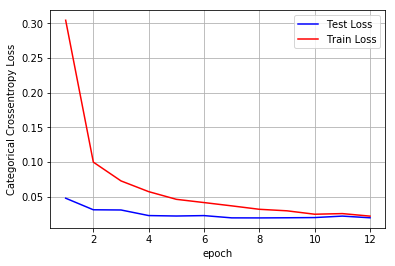

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h3>1.2 with kernal_size = (2,2), BN and MaxPooling</h3>

In [0]:
model = Sequential()
model.add(Conv2D(22, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(44, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(66, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 36s 598us/step - loss: 0.1735 - acc: 0.9476 - val_loss: 0.0835 - val_acc: 0.9755
Epoch 2/12
60000/60000 [==============================] - 33s 557us/step - loss: 0.0520 - acc: 0.9848 - val_loss: 0.0563 - val_acc: 0.9842
Epoch 3/12
60000/60000 [==============================] - 34s 558us/step - loss: 0.0367 - acc: 0.9889 - val_loss: 0.0633 - val_acc: 0.9809
Epoch 4/12
60000/60000 [==============================] - 34s 559us/step - loss: 0.0271 - acc: 0.9919 - val_loss: 0.0431 - val_acc: 0.9872
Epoch 5/12
60000/60000 [==============================] - 34s 560us/step - loss: 0.0227 - acc: 0.9929 - val_loss: 0.0541 - val_acc: 0.9846
Epoch 6/12
60000/60000 [==============================] - 33s 554us/step - loss: 0.0195 - acc: 0.9937 - val_loss: 0.0389 - val_acc: 0.9874
Epoch 7/12
60000/60000 [==============================] - 33s 552us/step - loss: 0.0138 - acc: 0.9960 - val_loss: 0.

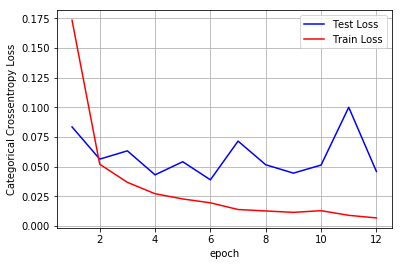

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h3>1.3 with kernal_size = (5,5), Dropout = 0.3, BN and MaxPooling</h3>

In [0]:
model = Sequential()
model.add(Conv2D(44, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(89, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(165, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(97, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 190s 3ms/step - loss: 0.1844 - acc: 0.9458 - val_loss: 0.0639 - val_acc: 0.9786
Epoch 2/12
60000/60000 [==============================] - 187s 3ms/step - loss: 0.0554 - acc: 0.9842 - val_loss: 0.0661 - val_acc: 0.9794
Epoch 3/12
60000/60000 [==============================] - 187s 3ms/step - loss: 0.0388 - acc: 0.9886 - val_loss: 0.0875 - val_acc: 0.9726
Epoch 4/12
60000/60000 [==============================] - 188s 3ms/step - loss: 0.0295 - acc: 0.9910 - val_loss: 0.0565 - val_acc: 0.9839
Epoch 5/12
60000/60000 [==============================] - 188s 3ms/step - loss: 0.0259 - acc: 0.9924 - val_loss: 0.0264 - val_acc: 0.9923
Epoch 6/12
60000/60000 [==============================] - 187s 3ms/step - loss: 0.0221 - acc: 0.9935 - val_loss: 0.0581 - val_acc: 0.9826
Epoch 7/12
60000/60000 [==============================] - 187s 3ms/step - loss: 0.0203 - acc: 0.9936 - val_loss: 0.0231 - 

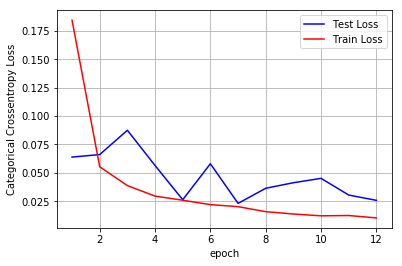

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2>MODEL2 : Five Convolutional Network with Adam as optimizer</h2>

<h3>2.1 with kernal_size = (3,3), Dropout = 0.25 and MaxPooling(pool_size =(3,3))

In [0]:
model = Sequential()
model.add(Conv2D(25, kernel_size=(3, 3), activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(55, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(78, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(108, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 52s 866us/step - loss: 0.5362 - acc: 0.8196 - val_loss: 0.2049 - val_acc: 0.9340
Epoch 2/12
60000/60000 [==============================] - 50s 828us/step - loss: 0.1620 - acc: 0.9507 - val_loss: 0.1245 - val_acc: 0.9607
Epoch 3/12
60000/60000 [==============================] - 50s 826us/step - loss: 0.1150 - acc: 0.9657 - val_loss: 0.1350 - val_acc: 0.9579
Epoch 4/12
60000/60000 [==============================] - 50s 828us/step - loss: 0.0891 - acc: 0.9735 - val_loss: 0.0887 - val_acc: 0.9728
Epoch 5/12
60000/60000 [==============================] - 49s 822us/step - loss: 0.0737 - acc: 0.9780 - val_loss: 0.0671 - val_acc: 0.9785
Epoch 6/12
60000/60000 [==============================] - 50s 828us/step - loss: 0.0608 - acc: 0.9821 - val_loss: 0.0594 - val_acc: 0.9834
Epoch 7/12
60000/60000 [==============================] - 50s 830us/step - loss: 0.0532 - acc: 0.9845 - val_loss: 0.

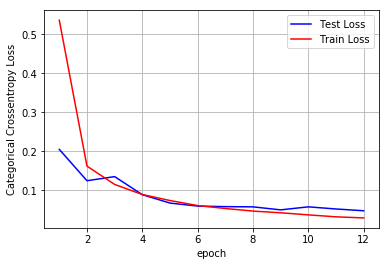

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h3>2.2 with kernal_size = (2,2), BN and MaxPooling</h3>

In [0]:
model = Sequential()
model.add(Conv2D(29, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(38, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(49, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(65, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(85, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(133, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(95, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(76, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 48s 806us/step - loss: 0.2226 - acc: 0.9305 - val_loss: 0.5700 - val_acc: 0.8309
Epoch 2/12
60000/60000 [==============================] - 45s 755us/step - loss: 0.0601 - acc: 0.9812 - val_loss: 0.2280 - val_acc: 0.9181
Epoch 3/12
60000/60000 [==============================] - 45s 754us/step - loss: 0.0442 - acc: 0.9866 - val_loss: 0.3382 - val_acc: 0.8997
Epoch 4/12
60000/60000 [==============================] - 45s 757us/step - loss: 0.0373 - acc: 0.9880 - val_loss: 0.3386 - val_acc: 0.8938
Epoch 5/12
60000/60000 [==============================] - 45s 752us/step - loss: 0.0314 - acc: 0.9896 - val_loss: 0.1397 - val_acc: 0.9567
Epoch 6/12
60000/60000 [==============================] - 45s 756us/step - loss: 0.0280 - acc: 0.9911 - val_loss: 0.0629 - val_acc: 0.9796
Epoch 7/12
60000/60000 [==============================] - 45s 754us/step - loss: 0.0259 - acc: 0.9916 - val_loss: 0.

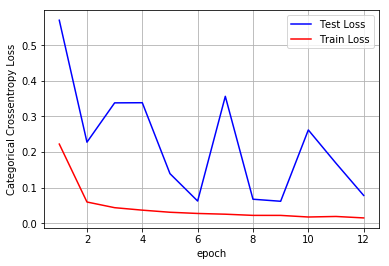

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h3>2.3 with kernal_size = (5,5), Dropout = 0.3, BN and MaxPooling</h3>

In [0]:
model = Sequential()
model.add(Conv2D(22, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(43, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(78, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(93, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(117, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(86, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(65, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(45, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 187s 3ms/step - loss: 0.8045 - acc: 0.7231 - val_loss: 0.1296 - val_acc: 0.9698
Epoch 2/12
60000/60000 [==============================] - 181s 3ms/step - loss: 0.1377 - acc: 0.9703 - val_loss: 0.0774 - val_acc: 0.9839
Epoch 3/12
60000/60000 [==============================] - 188s 3ms/step - loss: 0.0970 - acc: 0.9804 - val_loss: 0.0457 - val_acc: 0.9895
Epoch 4/12
60000/60000 [==============================] - 182s 3ms/step - loss: 0.0731 - acc: 0.9852 - val_loss: 0.0587 - val_acc: 0.9878
Epoch 5/12
60000/60000 [==============================] - 184s 3ms/step - loss: 0.0611 - acc: 0.9874 - val_loss: 0.0421 - val_acc: 0.9890
Epoch 6/12
60000/60000 [==============================] - 199s 3ms/step - loss: 0.0543 - acc: 0.9890 - val_loss: 0.0482 - val_acc: 0.9907
Epoch 7/12
60000/60000 [==============================] - 184s 3ms/step - loss: 0.0481 - acc: 0.9902 - val_loss: 0.0443 - 

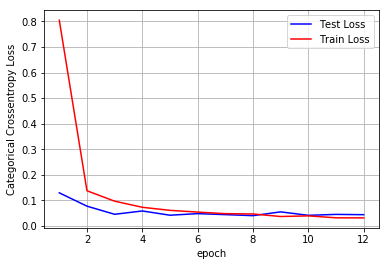

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2>MODEL3 : Seven Convolutional Network with Adam as optimizer</h2>

<h3>3.1 with kernal_size = (3,3), Dropout = 0.25 and MaxPooling(pool_size =(3,3))

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(45, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(60, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), padding='same'))

model.add(Conv2D(78, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), padding='same'))

model.add(Conv2D(95, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), padding='same'))

model.add(Conv2D(112, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), padding='same'))

model.add(Conv2D(145, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 54s 906us/step - loss: 1.0199 - acc: 0.6124 - val_loss: 0.4529 - val_acc: 0.8509
Epoch 2/12
60000/60000 [==============================] - 51s 856us/step - loss: 0.2891 - acc: 0.9129 - val_loss: 0.1822 - val_acc: 0.9427
Epoch 3/12
60000/60000 [==============================] - 51s 856us/step - loss: 0.1613 - acc: 0.9527 - val_loss: 0.1207 - val_acc: 0.9632
Epoch 4/12
60000/60000 [==============================] - 52s 859us/step - loss: 0.1138 - acc: 0.9666 - val_loss: 0.0989 - val_acc: 0.9720
Epoch 5/12
60000/60000 [==============================] - 52s 862us/step - loss: 0.0867 - acc: 0.9756 - val_loss: 0.0634 - val_acc: 0.9819
Epoch 6/12
60000/60000 [==============================] - 52s 859us/step - loss: 0.0728 - acc: 0.9794 - val_loss: 0.0558 - val_acc: 0.9838
Epoch 7/12
60000/60000 [==============================] - 51s 854us/step - loss: 0.0595 - acc: 0.9834 - val_loss: 0.

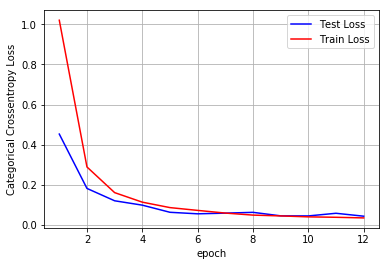

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h3>3.2 with kernal_size = (2,2), BN and MaxPooling</h3>

In [0]:
model = Sequential()
model.add(Conv2D(22, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(45, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(65, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(97, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(114, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(126, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(143, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(97, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(65, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 49s 820us/step - loss: 0.1746 - acc: 0.9474 - val_loss: 0.6559 - val_acc: 0.8074
Epoch 2/12
60000/60000 [==============================] - 45s 756us/step - loss: 0.0571 - acc: 0.9826 - val_loss: 0.9573 - val_acc: 0.7192
Epoch 3/12
60000/60000 [==============================] - 45s 753us/step - loss: 0.0413 - acc: 0.9870 - val_loss: 0.6679 - val_acc: 0.8027
Epoch 4/12
60000/60000 [==============================] - 45s 747us/step - loss: 0.0337 - acc: 0.9895 - val_loss: 1.2193 - val_acc: 0.6971
Epoch 5/12
60000/60000 [==============================] - 45s 751us/step - loss: 0.0307 - acc: 0.9903 - val_loss: 0.2132 - val_acc: 0.9408
Epoch 6/12
60000/60000 [==============================] - 45s 746us/step - loss: 0.0249 - acc: 0.9920 - val_loss: 4.0905 - val_acc: 0.3624
Epoch 7/12
60000/60000 [==============================] - 45s 742us/step - loss: 0.0226 - acc: 0.9928 - val_loss: 0.

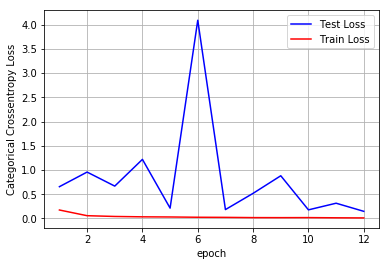

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h3>3.3 with kernal_size = (5,5), Dropout = 0.3, BN and MaxPooling</h3>

In [0]:
model = Sequential()
model.add(Conv2D(12, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(43, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(60, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(85, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(112, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(143, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(157, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(98, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(56, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 215s 4ms/step - loss: 0.5735 - acc: 0.8168 - val_loss: 0.1044 - val_acc: 0.9725
Epoch 2/12
60000/60000 [==============================] - 211s 4ms/step - loss: 0.1121 - acc: 0.9726 - val_loss: 0.0711 - val_acc: 0.9831
Epoch 3/12
60000/60000 [==============================] - 211s 4ms/step - loss: 0.0739 - acc: 0.9814 - val_loss: 0.0470 - val_acc: 0.9873
Epoch 4/12
60000/60000 [==============================] - 211s 4ms/step - loss: 0.0560 - acc: 0.9859 - val_loss: 0.0749 - val_acc: 0.9805
Epoch 5/12
60000/60000 [==============================] - 212s 4ms/step - loss: 0.0474 - acc: 0.9877 - val_loss: 0.0456 - val_acc: 0.9883
Epoch 6/12
60000/60000 [==============================] - 211s 4ms/step - loss: 0.0398 - acc: 0.9901 - val_loss: 0.0426 - val_acc: 0.9889
Epoch 7/12
60000/60000 [==============================] - 211s 4ms/step - loss: 0.0387 - acc: 0.9904 - val_loss: 0.0446 - 

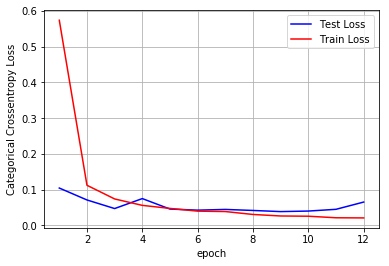

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [2]:
#Activation function is relu in each layers
#Adam optimizers is used in each case
#MaxPooling is used in each case of cnn_layers of pool_size=(2, 2)

from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["No. of CNN_Layers","kernal_size","Batch Normalisations","Dropout","No. of hidden layers", "Test loss", "Test Accuracy"]

x.add_row([3, (3,3), "No", 0.5, 1, 0.019, 0.99])
x.add_row([3, (2,2), "Yes", "No dropout", 1, 0.045, 0.98])
x.add_row([3, (5,5), "Yes", 0.3, 2, 0.025, 0.99])
x.add_row([5, (3,3), "No", 0.25, 1, 0.047, 0.98])
x.add_row([5, (2,2), "Yes", "No droput", 3, 0.078, 0.97])
x.add_row([5, (5,5), "Yes", 0.3, 3, 0.044, 0.99])
x.add_row([7, (3,3), "No", 0.25, 1, 0.043, 0.98])
x.add_row([7, (2,2), "Yes", "No dropout", 2, 0.147, 0.96])
x.add_row([7, (5,5), "Yes", 0.3, 2, 0.065, 0.98])
print(x)

+-------------------+-------------+----------------------+------------+----------------------+-----------+---------------+
| No. of CNN_Layers | kernal_size | Batch Normalisations |  Dropout   | No. of hidden layers | Test loss | Test Accuracy |
+-------------------+-------------+----------------------+------------+----------------------+-----------+---------------+
|         3         |    (3, 3)   |          No          |    0.5     |          1           |   0.019   |      0.99     |
|         3         |    (2, 2)   |         Yes          | No dropout |          1           |   0.045   |      0.98     |
|         3         |    (5, 5)   |         Yes          |    0.3     |          2           |   0.025   |      0.99     |
|         5         |    (3, 3)   |          No          |    0.25    |          1           |   0.047   |      0.98     |
|         5         |    (2, 2)   |         Yes          | No droput  |          3           |   0.078   |      0.97     |
|         5     

<h2> step by step procedure for above experiment</h2>

1.Three different architecture of convolution layer has been implemented.There are three , five and seven convolution layers with "**Adam optimizers**" in each case

2.**First architecture i.e. three convolution layer** has been further experimented in three more categories.

3.In each categories, with different kernal size, dropout and maxpooling experiment has been performed

4.For the first categories kernal size is (3,3), dropout=0.5 and maxpoolsize=(3,3).

5.For the second categories kernal size is(2,2), same maxpooling as above with bathnormalisation and with no dropout experiment has been performed.

6.For the third categories kernal size is(5,5), same maxpooling with bathnormalisation and dropout= 0.3 experiment has been performed.

7.for each categories test score and test accuracy has been evaluated with different parameter.


8.**Second architecture (i.e. five convolution layer)** has been further experimented in three more categories in the same way as first architecture.

9.In each categories, with different kernal size, dropout and maxpooling experiment has been performed

10.For the first categories kernal size is (3,3), dropout=0.25 and maxpoolsize=(3,3).

11.For the second categories kernal size is(2,2), same maxpooling as above with bathnormalisation and with no dropout experiment has been performed.

12.For the third categories kernal size is(5,5), same maxpooling with bathnormalisation and dropout= 0.3 experiment has been performed.

13.for each categories test score and test accuracy has been evaluated with different parameter.


14.**Third architecture (i.e. Seven convolution layer)** has been further experimented in three more categories in the same way as first and second architecture.

15.In each categories, with different kernal size, dropout and maxpooling experiment has been performed

16.For the first categories kernal size is (3,3), dropout=0.25 and maxpoolsize=(3,3).

17.For the second categories kernal size is(2,2), same maxpooling as above with bathnormalisation and with no dropout experiment has been performed.

18.For the third categories kernal size is(5,5), same maxpooling with bathnormalisation and dropout= 0.3 experiment has been performed.

19.for each categories test score and test accuracy has been evaluated with different parameter.

20.see the **preetytable** to observe the different result in different case 

<h2>MODEL1 : Three Convolutional Network with RMSprop as optimizer</h2>

<h3>1.1 with kernal_size = (3,3), Dropout = 0.5 and MaxPooling(pool_size =(2,2))

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(75, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 183s 3ms/step - loss: 0.2702 - acc: 0.9158 - val_loss: 0.0478 - val_acc: 0.9850
Epoch 2/12
60000/60000 [==============================] - 179s 3ms/step - loss: 0.0852 - acc: 0.9754 - val_loss: 0.0388 - val_acc: 0.9871
Epoch 3/12
60000/60000 [==============================] - 178s 3ms/step - loss: 0.0597 - acc: 0.9833 - val_loss: 0.0291 - val_acc: 0.9910
Epoch 4/12
60000/60000 [==============================] - 178s 3ms/step - loss: 0.0484 - acc: 0.9860 - val_loss: 0.0252 - val_acc: 0.9924
Epoch 5/12
60000/60000 [==============================] - 178s 3ms/step - loss: 0.0420 - acc: 0.9882 - val_loss: 0.0302 - val_acc: 0.9907
Epoch 6/12
60000/60000 [==============================] - 178s 3ms/step - loss: 0.0377 - acc: 0.9895 - val_loss: 0.0255 - val_acc: 0.9916
Epoch 7/12
60000/60000 [==============================] - 178s 3ms/step - loss: 0.0367 - acc: 0.9899 - val_loss: 0.0224 - 

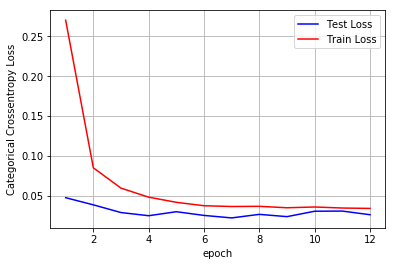

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h3>1.2 with kernal_size = (2,2), BN and MaxPooling</h3>

In [0]:
model = Sequential()
model.add(Conv2D(22, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(44, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(66, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 38s 639us/step - loss: 0.1467 - acc: 0.9554 - val_loss: 0.1191 - val_acc: 0.9636
Epoch 2/12
60000/60000 [==============================] - 34s 568us/step - loss: 0.0515 - acc: 0.9841 - val_loss: 0.0580 - val_acc: 0.9826
Epoch 3/12
60000/60000 [==============================] - 34s 570us/step - loss: 0.0360 - acc: 0.9892 - val_loss: 0.0840 - val_acc: 0.9747
Epoch 4/12
60000/60000 [==============================] - 34s 568us/step - loss: 0.0281 - acc: 0.9911 - val_loss: 0.0596 - val_acc: 0.9822
Epoch 5/12
60000/60000 [==============================] - 34s 566us/step - loss: 0.0218 - acc: 0.9932 - val_loss: 0.0499 - val_acc: 0.9846
Epoch 6/12
60000/60000 [==============================] - 34s 568us/step - loss: 0.0179 - acc: 0.9943 - val_loss: 0.0514 - val_acc: 0.9849
Epoch 7/12
60000/60000 [==============================] - 34s 568us/step - loss: 0.0146 - acc: 0.9951 - val_loss: 0.

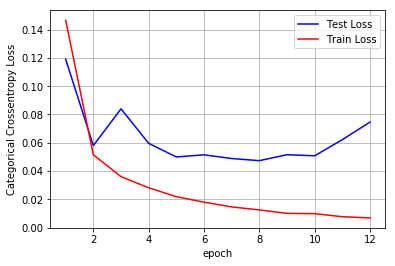

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h3>1.3 with kernal_size = (5,5), Dropout = 0.3, BN and MaxPooling</h3>

In [0]:
model = Sequential()
model.add(Conv2D(44, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(89, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(165, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(97, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 195s 3ms/step - loss: 1.0009 - acc: 0.6653 - val_loss: 3.8346 - val_acc: 0.3946
Epoch 2/12
60000/60000 [==============================] - 191s 3ms/step - loss: 0.4697 - acc: 0.8464 - val_loss: 1.8055 - val_acc: 0.5506
Epoch 3/12
60000/60000 [==============================] - 190s 3ms/step - loss: 0.3592 - acc: 0.8845 - val_loss: 0.3017 - val_acc: 0.9077
Epoch 4/12
60000/60000 [==============================] - 189s 3ms/step - loss: 0.2422 - acc: 0.9255 - val_loss: 0.1909 - val_acc: 0.9426
Epoch 5/12
60000/60000 [==============================] - 188s 3ms/step - loss: 0.1920 - acc: 0.9413 - val_loss: 0.3387 - val_acc: 0.9023
Epoch 6/12
60000/60000 [==============================] - 189s 3ms/step - loss: 0.1515 - acc: 0.9537 - val_loss: 0.8797 - val_acc: 0.7712
Epoch 7/12
60000/60000 [==============================] - 192s 3ms/step - loss: 0.1412 - acc: 0.9584 - val_loss: 0.3180 - 

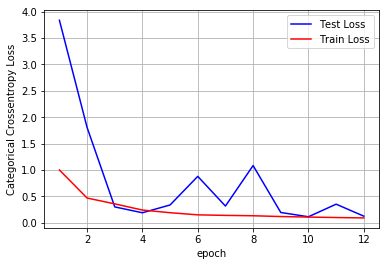

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2>MODEL2 : Five Convolutional Network with RMSprop as optimizer</h2>

<h3>2.1 with kernal_size = (3,3), Dropout = 0.25 and MaxPooling(pool_size =(3,3))

In [0]:
model = Sequential()
model.add(Conv2D(25, kernel_size=(3, 3), activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(55, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(78, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(108, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 54s 900us/step - loss: 0.8243 - acc: 0.7197 - val_loss: 0.7556 - val_acc: 0.8198
Epoch 2/12
60000/60000 [==============================] - 50s 834us/step - loss: 0.3361 - acc: 0.9033 - val_loss: 0.3976 - val_acc: 0.8882
Epoch 3/12
60000/60000 [==============================] - 50s 834us/step - loss: 0.4302 - acc: 0.8970 - val_loss: 0.3611 - val_acc: 0.9197
Epoch 4/12
60000/60000 [==============================] - 50s 836us/step - loss: 0.5801 - acc: 0.8971 - val_loss: 0.9266 - val_acc: 0.8555
Epoch 5/12
60000/60000 [==============================] - 50s 833us/step - loss: 1.3400 - acc: 0.8779 - val_loss: 3.6306 - val_acc: 0.7680
Epoch 6/12
60000/60000 [==============================] - 49s 822us/step - loss: 3.5538 - acc: 0.7767 - val_loss: 3.5029 - val_acc: 0.7813
Epoch 7/12
60000/60000 [==============================] - 50s 829us/step - loss: 5.9515 - acc: 0.6299 - val_loss: 11

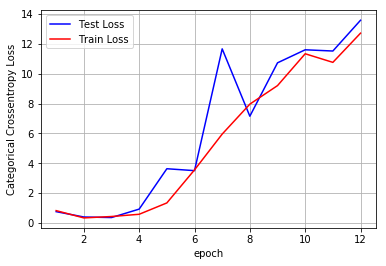

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h3>2.2 with kernal_size = (2,2), BN and MaxPooling</h3>

In [0]:
model = Sequential()
model.add(Conv2D(29, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(38, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(49, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(65, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(85, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(133, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(95, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(76, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 50s 840us/step - loss: 0.1994 - acc: 0.9389 - val_loss: 1.0779 - val_acc: 0.7011
Epoch 2/12
60000/60000 [==============================] - 46s 761us/step - loss: 0.0684 - acc: 0.9791 - val_loss: 0.2030 - val_acc: 0.9359
Epoch 3/12
60000/60000 [==============================] - 46s 762us/step - loss: 0.0495 - acc: 0.9851 - val_loss: 1.3340 - val_acc: 0.6433
Epoch 4/12
60000/60000 [==============================] - 46s 765us/step - loss: 0.0399 - acc: 0.9873 - val_loss: 0.1545 - val_acc: 0.9549
Epoch 5/12
60000/60000 [==============================] - 46s 769us/step - loss: 0.0350 - acc: 0.9886 - val_loss: 0.3375 - val_acc: 0.8983
Epoch 6/12
60000/60000 [==============================] - 46s 767us/step - loss: 0.0287 - acc: 0.9910 - val_loss: 0.3413 - val_acc: 0.9106
Epoch 7/12
60000/60000 [==============================] - 46s 763us/step - loss: 0.0253 - acc: 0.9918 - val_loss: 0.

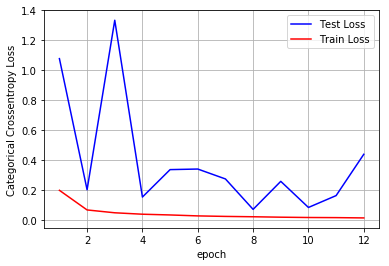

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h3>2.3 with kernal_size = (5,5), Dropout = 0.3, BN and MaxPooling</h3>

In [0]:
model = Sequential()
model.add(Conv2D(22, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(43, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(78, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(93, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(117, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(86, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(65, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(45, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 208s 3ms/step - loss: 11.4338 - acc: 0.1039 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 2/12
60000/60000 [==============================] - 196s 3ms/step - loss: 13.2848 - acc: 0.1094 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 3/12
60000/60000 [==============================] - 200s 3ms/step - loss: 13.3054 - acc: 0.1082 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 4/12
60000/60000 [==============================] - 197s 3ms/step - loss: 13.2475 - acc: 0.1097 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 5/12
60000/60000 [==============================] - 200s 3ms/step - loss: 13.2673 - acc: 0.1094 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 6/12
60000/60000 [==============================] - 200s 3ms/step - loss: 13.2961 - acc: 0.1085 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 7/12
60000/60000 [==============================] - 197s 3ms/step - loss: 13.2780 - acc: 0.1099 - val_lo

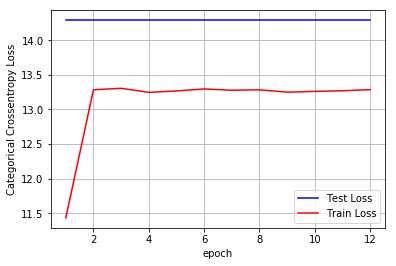

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2>MODEL3 : Seven Convolutional Network with RMSprop as optimizer</h2>

<h3>3.1 with kernal_size = (3,3), Dropout = 0.25 and MaxPooling(pool_size =(3,3))

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(45, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(60, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), padding='same'))

model.add(Conv2D(78, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), padding='same'))

model.add(Conv2D(95, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), padding='same'))

model.add(Conv2D(112, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), padding='same'))

model.add(Conv2D(145, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 57s 954us/step - loss: 2.3342 - acc: 0.1844 - val_loss: 2.3024 - val_acc: 0.1135
Epoch 2/12
60000/60000 [==============================] - 53s 878us/step - loss: 2.3016 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 3/12
60000/60000 [==============================] - 52s 873us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 4/12
60000/60000 [==============================] - 52s 873us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 5/12
60000/60000 [==============================] - 52s 874us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 6/12
60000/60000 [==============================] - 52s 870us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 7/12
60000/60000 [==============================] - 52s 873us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.

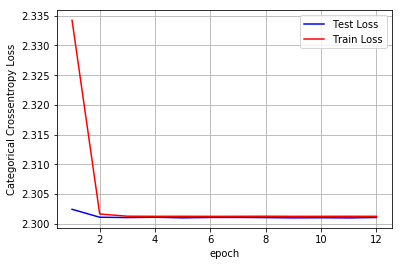

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h3>3.2 with kernal_size = (2,2), BN and MaxPooling</h3>

In [0]:
model = Sequential()
model.add(Conv2D(22, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(45, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(65, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(97, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(114, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(126, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(143, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(97, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(65, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 51s 852us/step - loss: 0.2137 - acc: 0.9356 - val_loss: 12.6879 - val_acc: 0.2101
Epoch 2/12
60000/60000 [==============================] - 46s 758us/step - loss: 0.0835 - acc: 0.9751 - val_loss: 12.6732 - val_acc: 0.0958
Epoch 3/12
60000/60000 [==============================] - 45s 750us/step - loss: 0.2566 - acc: 0.9276 - val_loss: 14.4918 - val_acc: 0.1009
Epoch 4/12
60000/60000 [==============================] - 47s 776us/step - loss: 0.1935 - acc: 0.9418 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 5/12
60000/60000 [==============================] - 47s 782us/step - loss: 0.0639 - acc: 0.9805 - val_loss: 14.5477 - val_acc: 0.0958
Epoch 6/12
60000/60000 [==============================] - 47s 784us/step - loss: 0.0788 - acc: 0.9764 - val_loss: 14.4918 - val_acc: 0.1009
Epoch 7/12
60000/60000 [==============================] - 48s 794us/step - loss: 0.0602 - acc: 0.9819 - val_lo

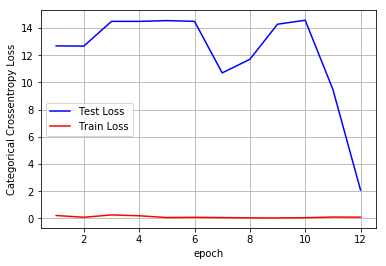

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h3>3.3 with kernal_size = (5,5), Dropout = 0.3, BN and MaxPooling</h3>

In [0]:
model = Sequential()
model.add(Conv2D(12, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(43, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(60, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(85, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(112, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(143, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(157, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(98, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(56, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 221s 4ms/step - loss: 2.2941 - acc: 0.1903 - val_loss: 5.8873 - val_acc: 0.1135
Epoch 2/12
60000/60000 [==============================] - 214s 4ms/step - loss: 2.1791 - acc: 0.1547 - val_loss: 2.9495 - val_acc: 0.1135
Epoch 3/12
60000/60000 [==============================] - 214s 4ms/step - loss: 2.3021 - acc: 0.1100 - val_loss: 2.3133 - val_acc: 0.1135
Epoch 4/12
60000/60000 [==============================] - 214s 4ms/step - loss: 2.3018 - acc: 0.1108 - val_loss: 2.3051 - val_acc: 0.1135
Epoch 5/12
60000/60000 [==============================] - 214s 4ms/step - loss: 2.3017 - acc: 0.1109 - val_loss: 2.3050 - val_acc: 0.0974
Epoch 6/12
60000/60000 [==============================] - 213s 4ms/step - loss: 2.3016 - acc: 0.1113 - val_loss: 2.3030 - val_acc: 0.1135
Epoch 7/12
60000/60000 [==============================] - 214s 4ms/step - loss: 2.3016 - acc: 0.1119 - val_loss: 2.3042 - 

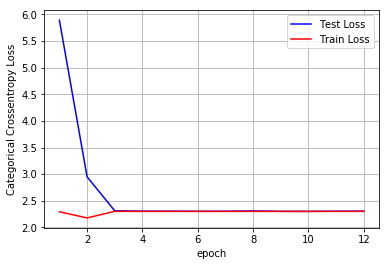

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [1]:
#Activation function is relu in each layers
#RMSprop optimizers is used in each case
#MaxPooling is used in each case of cnn_layers of pool_size=(2, 2)

from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["No. of CNN_Layers","kernal_size","Batch Normalisations","Dropout","No. of hidden layers", "Test loss", "Test Accuracy"]

x.add_row([3, (3,3), "No", 0.5, 1, 0.026, 0.99])
x.add_row([3, (2,2), "Yes", "No dropout", 1, 0.074, 0.98])
x.add_row([3, (5,5), "Yes", 0.3, 2, 0.126, 0.96])
x.add_row([5, (3,3), "No", 0.25, 1, 13.57, 0.15])
x.add_row([5, (2,2), "Yes", "No droput", 3, 0.439, 0.89])
x.add_row([5, (5,5), "Yes", 0.3, 3, 14.28, 0.11])
x.add_row([7, (3,3), "No", 0.25, 1, 2.30, 0.11])
x.add_row([7, (2,2), "Yes", "No dropout", 2, 2.08, 0.65])
x.add_row([7, (5,5), "Yes", 0.3, 2, 2.30, 0.11])
print(x)

+-------------------+-------------+----------------------+------------+----------------------+-----------+---------------+
| No. of CNN_Layers | kernal_size | Batch Normalisations |  Dropout   | No. of hidden layers | Test loss | Test Accuracy |
+-------------------+-------------+----------------------+------------+----------------------+-----------+---------------+
|         3         |    (3, 3)   |          No          |    0.5     |          1           |   0.026   |      0.99     |
|         3         |    (2, 2)   |         Yes          | No dropout |          1           |   0.074   |      0.98     |
|         3         |    (5, 5)   |         Yes          |    0.3     |          2           |   0.126   |      0.96     |
|         5         |    (3, 3)   |          No          |    0.25    |          1           |   13.57   |      0.15     |
|         5         |    (2, 2)   |         Yes          | No droput  |          3           |   0.439   |      0.89     |
|         5     

<h2>step by step procedure far above experiment</h2>

1.Three different architecture of convolution layer has been implemented.There are three , five and seven convolution layers with "**Adadelta optimizers**" in each case

2.**First architecture i.e. three convolution layer** has been further experimented in three more categories.

3.In each categories, with different kernal size, dropout and maxpooling experiment has been performed

4.For the first categories kernal size is (3,3), dropout=0.5 and maxpoolsize=(3,3).

5.For the second categories kernal size is(2,2), same maxpooling as above with bathnormalisation and with no dropout experiment has been performed.

6.For the third categories kernal size is(5,5), same maxpooling with bathnormalisation and dropout= 0.3 experiment has been performed.

7.for each categories test score and test accuracy has been evaluated with different parameter.


8.**Second architecture (i.e. five convolution layer)** has been further experimented in three more categories in the same way as first architecture.

9.In each categories, with different kernal size, dropout and maxpooling experiment has been performed

10.For the first categories kernal size is (3,3), dropout=0.25 and maxpoolsize=(3,3).

11.For the second categories kernal size is(2,2), same maxpooling as above with bathnormalisation and with no dropout experiment has been performed.

12.For the third categories kernal size is(5,5), same maxpooling with bathnormalisation and dropout= 0.3 experiment has been performed.

13.for each categories test score and test accuracy has been evaluated with different parameter.


14.**Third architecture (i.e. Seven convolution layer)** has been further experimented in three more categories in the same way as first and second architecture.

15.In each categories, with different kernal size, dropout and maxpooling experiment has been performed

16.For the first categories kernal size is (3,3), dropout=0.25 and maxpoolsize=(3,3).

17.For the second categories kernal size is(2,2), same maxpooling as above with bathnormalisation and with no dropout experiment has been performed.

18.For the third categories kernal size is(5,5), same maxpooling with bathnormalisation and dropout= 0.3 experiment has been performed.

19.for each categories test score and test accuracy has been evaluated with different parameter.

20.see the **preetytable** to observe the different result in different case 

<h2> Overall observations</h2>

1.We can observe Adam optimizer is better than Adadelta and RMSprop optimizer

2.With Adadelta optimizer test score is very worse when there is five and seven convolution layer

3.with batch normalisations and dropout accuracy can be improved much

4.with different kernal size we can see different result with lower kernal size test accuracy is much better

5.In this assignment I have experimented with different parameter and observe their result in each of the cases using prettytable.

6.I enjoyed a lot while doing this experiment.